# Loading Libraries

In [1]:

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import os, gc

pd.options.display.max_columns = None

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import KFold
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor

#Dependencies
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from sklearn.metrics import  confusion_matrix,classification_report,matthews_corrcoef

In [2]:
df = pd.read_csv("/kaggle/input/cepheus-23-data-science-hackathon-ps-i/train_data.csv")
test = pd.read_csv("/kaggle/input/cepheus-23-data-science-hackathon-ps-i/test_data.csv")


In [3]:
df.isnull().sum()

Unnamed: 0              0
Sample Name             0
Sample ID               0
Perimeter               0
Filled Area             0
Convex Area             0
Equivalent Radius       0
Extent                  0
Points of Extremum      0
Compactness             0
Diameter                0
Direction               0
Length of Major Axis    0
Length of Minor Axis    0
Bordered Area 1         0
Bordered Area 2         0
Bordered Area 3         0
Bordered Area 4         0
Centroid 1              0
Centroid 2              0
Convex Hull 1           0
Convex Hull 2           0
Convex Hull 3           0
Convex Hull 4           0
Bacteria                0
dtype: int64

**Insights:**

* The training set contains 83471 samples
* It has 25 features.
* There are no missing values

In [4]:
# Dropping unwanted columns
df.drop(['Sample Name', 'Sample ID', 'Unnamed: 0'], axis=1, inplace=True)
test.drop(['Sample Name', 'Sample ID', 'Unnamed: 0'], axis=1, inplace=True)

### Mapping labels to integers

In [5]:
bact_name = {
    
    "Raizovox":1,
    "Flitter":2,
    "Cruor":3,
    "Myaree":4,
    "Onyxium":5,
    "Elixoria":6,
    "Potentiopus":7,
    "Gelledius":8,
    "Charmayanne":9,
}


df['Bacteria'] = df['Bacteria'].map(bact_name)

<AxesSubplot:>

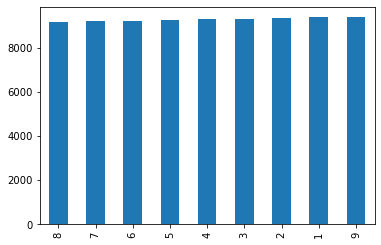

In [6]:
df['Bacteria'].value_counts().sort_values().plot(kind='bar')

## Dataset in balanced

In [7]:
X = df.drop("Bacteria", axis=1)
y = df["Bacteria"].values

# Standardizing the dataframe

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
test=scaler.transform(test)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [42]:
depth=[]
score_acc = []

kf = KFold(n_splits=20)
max_depths=[2,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39]

for max_depth in tqdm(max_depths):
    temp_acc=[]

    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        D_tree = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
        
        depth.append(max_depth)
        D_tree.fit(X_train, y_train)

        score_acc.append(accuracy_score(y_test,D_tree.predict(X_test)))
        temp_acc.append(accuracy_score(y_test,D_tree.predict(X_test)))
    print(max_depth,np.mean(temp_acc))

  5%|▌         | 1/19 [00:15<04:45, 15.87s/it]

2 0.2112265245662243


 11%|█         | 2/19 [00:53<08:04, 28.52s/it]

5 0.3160914030702083


 16%|█▌        | 3/19 [01:44<10:19, 38.72s/it]

7 0.40168283547771155


 21%|██        | 4/19 [02:47<12:08, 48.55s/it]

9 0.45210313672522984


 26%|██▋       | 5/19 [04:03<13:35, 58.27s/it]

11 0.5178686891373124


 32%|███▏      | 6/19 [05:29<14:42, 67.87s/it]

13 0.5717507883465144


 37%|███▋      | 7/19 [07:06<15:26, 77.24s/it]

15 0.6053047082856674


 42%|████▏     | 8/19 [08:51<15:48, 86.25s/it]

17 0.6223508881736943


 47%|████▋     | 9/19 [10:45<15:49, 94.91s/it]

19 0.631371265365193


 53%|█████▎    | 10/19 [12:47<15:28, 103.11s/it]

21 0.6353245893266671


 58%|█████▊    | 11/19 [14:55<14:45, 110.70s/it]

23 0.6354202943581337


 63%|██████▎   | 12/19 [17:10<13:47, 118.18s/it]

25 0.6348331724087963


 68%|██████▊   | 13/19 [19:31<12:31, 125.20s/it]

27 0.6347972241751714


 74%|███████▎  | 14/19 [21:57<10:56, 131.29s/it]

29 0.6345935108199503


 79%|███████▉  | 15/19 [24:26<09:06, 136.59s/it]

31 0.6342460102713832


 84%|████████▍ | 16/19 [26:57<07:03, 141.14s/it]

33 0.6342820159165448


 89%|████████▉ | 17/19 [29:31<04:50, 145.09s/it]

35 0.6341981405321888


 95%|█████████▍| 18/19 [32:09<02:28, 148.68s/it]

37 0.6351446271241263


100%|██████████| 19/19 [34:47<00:00, 109.85s/it]

39 0.6350607603515009


In [48]:
depth=[]
score_acc = []

kf = KFold(n_splits=10)
max_depths=[21,23,25,27,29,31,33]

for max_depth in tqdm(max_depths):
    temp_acc=[]

    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    

        r_for = RandomForestClassifier(criterion='entropy', max_depth=max_depth)
        
        depth.append(max_depth)
        r_for.fit(X_train, y_train)

        score_acc.append(accuracy_score(y_test,r_for.predict(X_test)))
        temp_acc.append(accuracy_score(y_test,r_for.predict(X_test)))
    print(max_depth,np.mean(temp_acc))

 14%|█▍        | 1/7 [11:45<1:10:34, 705.69s/it]

21 0.6404577068595525


 29%|██▊       | 2/7 [23:54<59:57, 719.58s/it]  

23 0.6413322725717843


 43%|████▎     | 3/7 [36:20<48:45, 731.42s/it]

25 0.6412244465315502


 57%|█████▋    | 4/7 [48:56<37:03, 741.28s/it]

27 0.6425183245715647


 71%|███████▏  | 5/7 [1:01:46<25:02, 751.32s/it]

29 0.6417755456040115


 86%|████████▌ | 6/7 [1:14:38<12:38, 758.37s/it]

31 0.6419911905088974


100%|██████████| 7/7 [1:27:39<00:00, 751.40s/it]

33 0.6420870347617929


In [12]:
classifier = RandomForestClassifier(criterion='entropy',max_depth=34, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=34, random_state=42)

In [13]:
inv_bact_name = {v:k for k, v in bact_name.items()}
pred = classifier.predict(test)

In [14]:
subm = pd.read_csv("/kaggle/input/cepheus-23-data-science-hackathon-ps-i/Sample Submission.csv")
subm['Bacteria']=pred
subm['Bacteria']=subm['Bacteria'].map(inv_bact_name)
subm.to_csv("sudharshan_question1.csv", index=False)